In [23]:
import sys
sys.path.insert(0, '../src/')
import plot_utils

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [24]:
df = pd.read_csv('../data_out/temp_full.csv', parse_dates=['DateTime'])
score_df = pd.read_csv('../data_out/temp_full_score.csv')
score_df

,Models,rmse,rsqr,mbe,corr,stddev
0,val_Layer1_LGBM,0.532,0.341,-0.018,0.582,0.468
1,val_Layer1_RFE,0.362,0.584,-0.006,0.761,0.418
2,val_Layer1_SVM,0.458,0.405,-0.054,0.633,0.365
3,val_Layer1_GP,0.650,0.009,0.070,0.094,0.012
4,val_Layer1_ANN,0.498,0.343,-0.003,0.580,0.420
5,val_Layer2_ensemble_LGBM,0.420,0.451,-0.002,0.669,0.424
6,val_Layer2_ensemble_RFE,0.408,0.479,-0.002,0.690,0.404
7,Layer2_LSTM_ensemble,3.143,0.365,0.410,0.604,2.186
8,val_Layer2_single_LGBM,0.426,0.466,0.001,0.682,0.399
9,val_Layer2_single_RFE,0.411,0.505,-0.001,0.709,0.416


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Unnamed: 0                       7248 non-null   int64         
 1   Fc                               5248 non-null   float64       
 2   DateTime                         7248 non-null   datetime64[ns]
 3   Ta                               7248 non-null   float64       
 4   Ws                               7248 non-null   float64       
 5   Fg                               7248 non-null   float64       
 6   VPD                              7248 non-null   float64       
 7   Fn                               7248 non-null   float64       
 8   q                                7248 non-null   float64       
 9   Ts                               7248 non-null   float64       
 10  Sws                              7248 non-null   float64    

In [26]:
test_df = df[(df['Set_rank']=='test') & (~df['Fc'].isna())].copy()

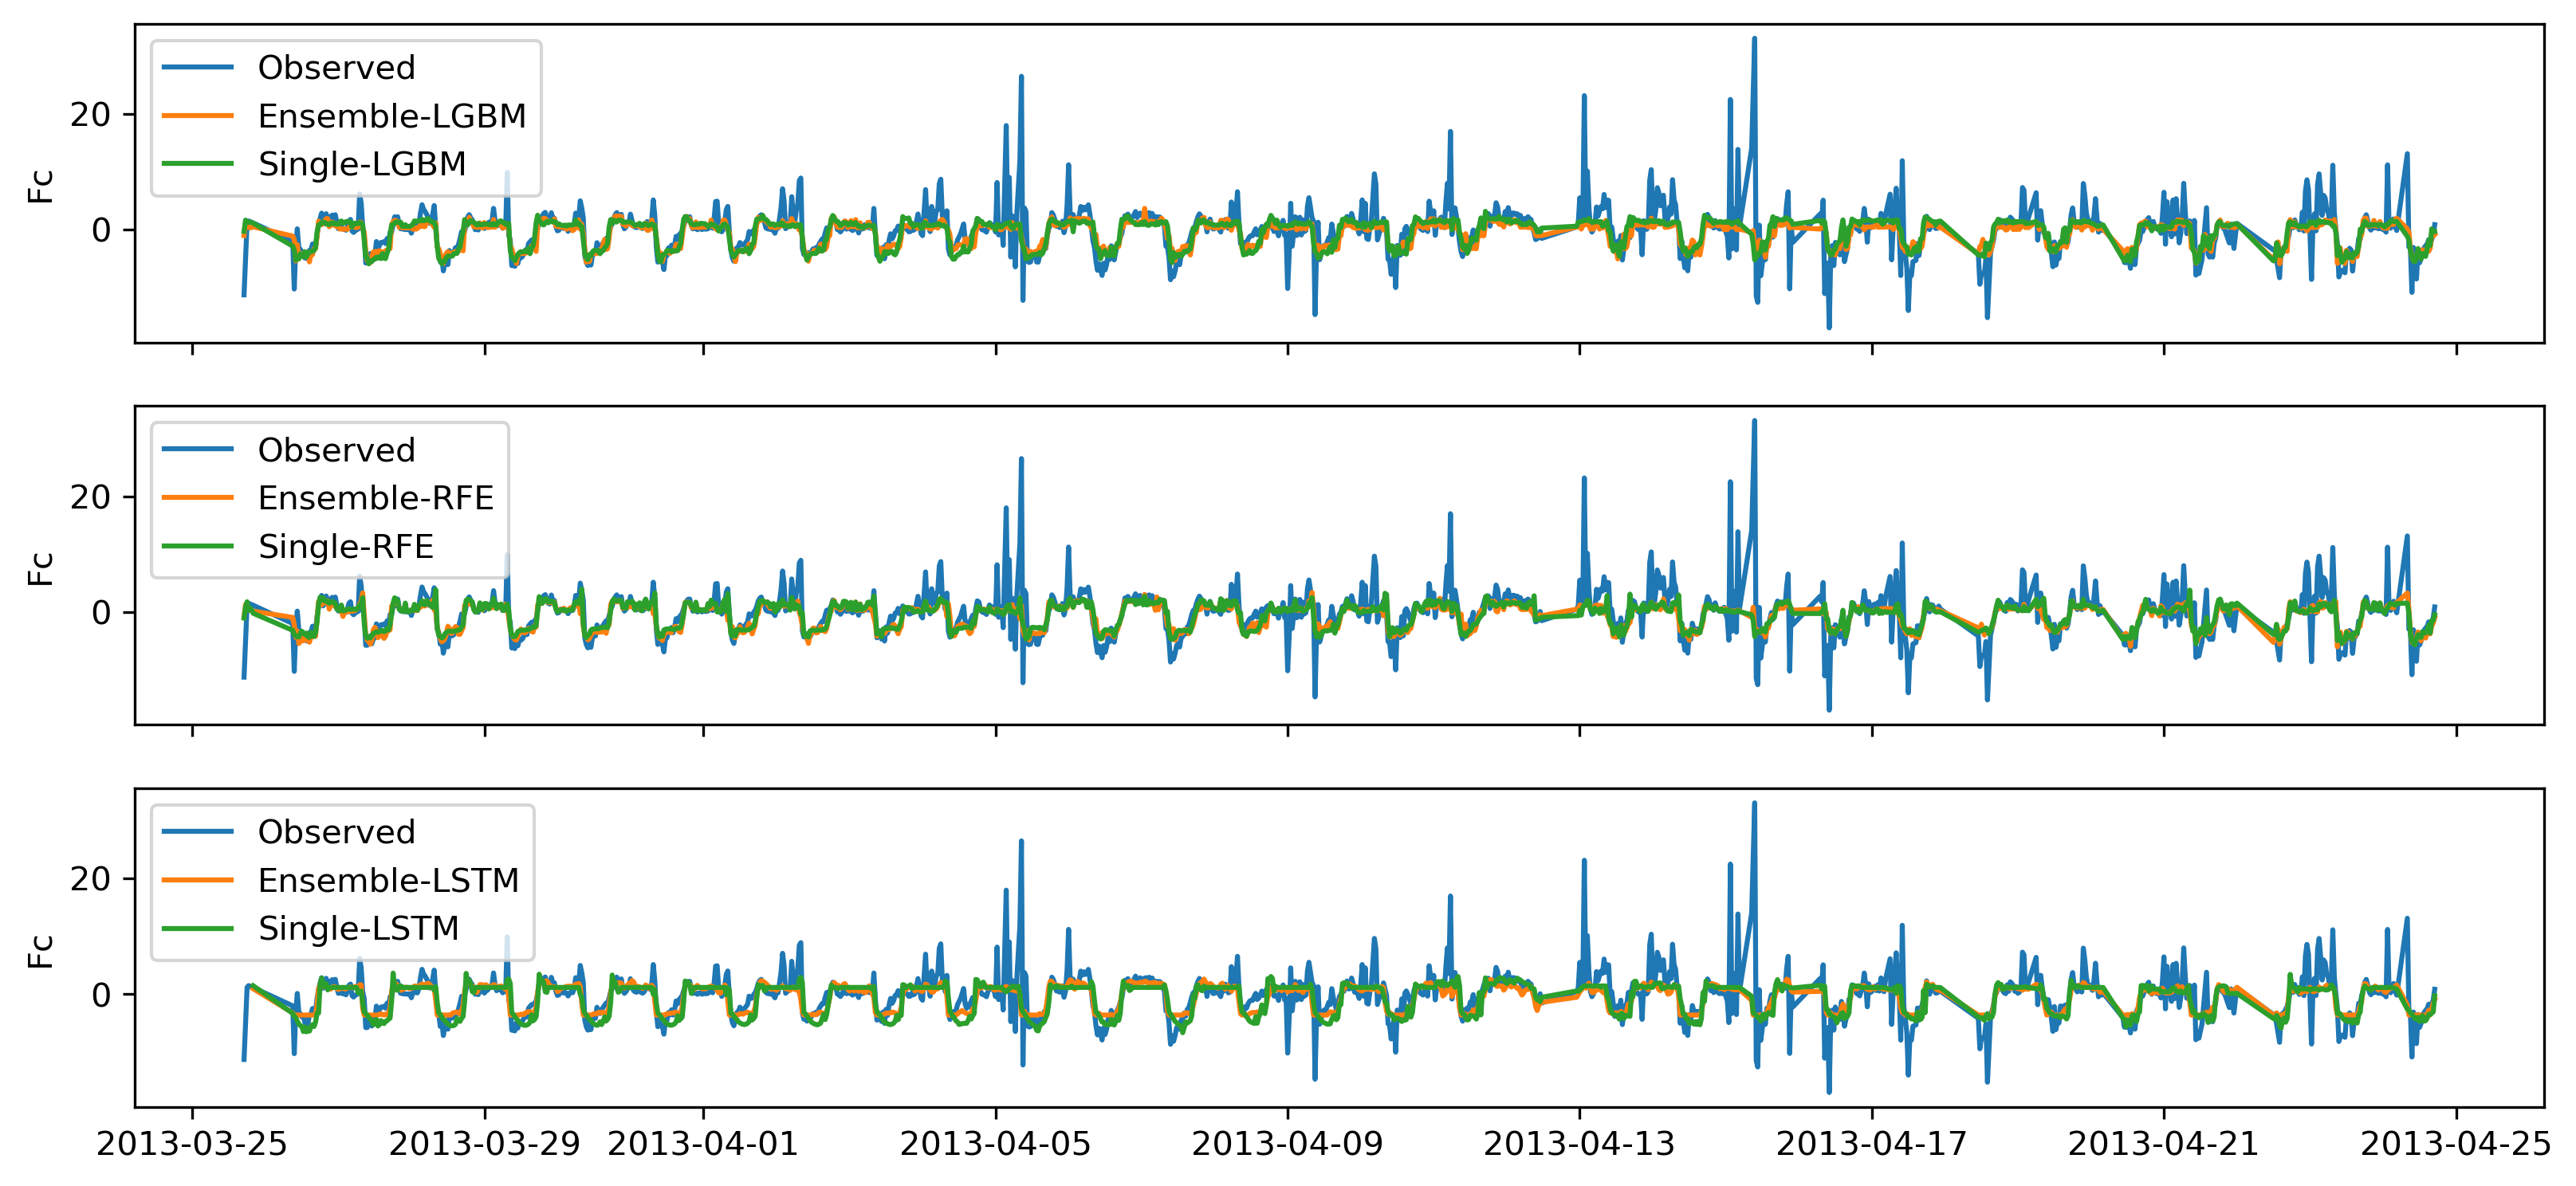

In [27]:
fig, ax = plt.subplots(figsize=(13,6), nrows=3, sharex=True, sharey=True, dpi=300)

for j, name in enumerate(['LGBM', 'RFE', 'LSTM']):
    ax[j].plot(test_df['DateTime'].values, test_df['Fc'].values, label='Observed')
    ax[j].plot(test_df['DateTime'].values, test_df['Fc_predicted_test_ensemble_' + name].values, 
               label='Ensemble-' + name)
    ax[j].plot(test_df['DateTime'].values, test_df['Fc_predicted_test_single_' + name].values, 
               label='Single-' + name)
    ax[j].legend(loc='upper left')
    ax[j].set_ylabel('Fc')

In [28]:
layer2_models = score_df[(~score_df['Models'].str.contains('val'))]

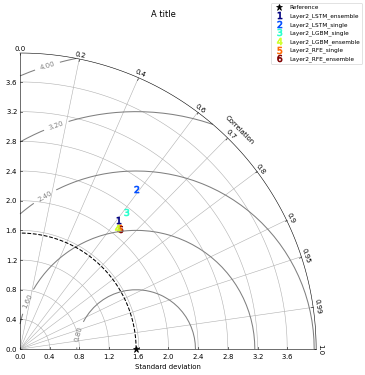

In [29]:
# Make dpi=300
metric = layer2_models[['stddev', 'corr', 'Models']].values
fig = plot_utils.taylor_diagram(metric, dpi=50, title='A title')
fig.savefig('savefn.png', dpi=300)